# Sentiment Analysis Preprocessing Step

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Splitting and *Saving*

We first import the necessary data set, files and packages. Further, we analyse the data and drop the missing or  NaN (Not a Number) values. Then, we use the Sentiment Scoring Model to make our own dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Through Vader module, we will divide our dataset in two types : Negative and Positive
#By sentiment analysis scores from user reivews and rating.
#The Vader module, need to be downloaded
nltk.download('vader_lexicon')

text_reviews = pd.read_csv('/content/drive/MyDrive/Team2_LDA/tripadvisor_hotel_reviews.csv')
text_reviews

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
19596,"best kept secret 3rd time staying charm, not 5...",5
19597,great location price view hotel great quick pl...,4
19598,"ok just looks nice modern outside, desk staff ...",2
19599,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
#Drop NaN values for better result.
text_reviews.dropna()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
19596,"best kept secret 3rd time staying charm, not 5...",5
19597,great location price view hotel great quick pl...,4
19598,"ok just looks nice modern outside, desk staff ...",2
19599,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
#Bring sentiment scoring model to build our own data set.
Sentiment_analysis = SentimentIntensityAnalyzer()

#Each sentiment dataset to be separated.
pos_reviews = pd.DataFrame(columns = ['review'])
neg_reviews = pd.DataFrame(columns = ['review'])
idx_pos = 0
idx_neg = 0

#Function will return scores from by sentiment analysis as, 1 = Positive, 0.7 < Neutral, 0 > Negative
def scoring_unit(review):
  analyzed_scores = Sentiment_analysis.polarity_scores(review)
  scoring = 0.5

  if analyzed_scores['compound'] >= 0.7:
    scoring = 1
  elif analyzed_scores['compound'] < 0:
    scoring = 0

  return scoring

#Save the reviews with the score data and ratings from Users
for idx, row in text_reviews.iterrows():
  
  # Break it, since we don't want to read false datas.
  if idx == len(text_reviews['Review']):
    break
  
  temp_score = scoring_unit(row['Review'])

  if temp_score == 1 and row['Rating'] >= 4:
    pos_reviews.at[idx_pos, 'review'] = row['Review']
    idx_pos += 1
  elif temp_score == 0 and row['Rating'] <= 2:
    neg_reviews.at[idx_neg, 'review'] = row['Review']
    idx_neg += 1

In [ ]:
pos_reviews

,review
0,nice hotel expensive parking got good deal sta...
1,"unique, great stay, wonderful time hotel monac..."
2,"great stay great stay, went seahawk game aweso..."
3,love monaco staff husband stayed hotel crazy w...
4,"cozy stay rainy city, husband spent 7 nights m..."
...,...
14081,great play stay stay loyal inn package deal ha...
14082,great choice wife chose best western quite bit...
14083,good bed clean convenient just night happy sta...
14084,"best kept secret 3rd time staying charm, not 5..."


In [ ]:
neg_reviews

,review
0,"bad choice, booked hotel hot wire called immed..."
1,warwick bad good reviews warwick shocks staff ...
2,"austin powers decor familiar, hotel seattlewhe..."
3,"hated inn terrible, room-service horrible staf..."
4,disappointed arranging anticipated girl weeken...
...,...
1257,not stay hotel brought group february worst ho...
1258,returning la concha nightmare surprising hotel...
1259,deceptive staff deceptive desk staff claiming ...
1260,not impressed unfriendly staff checked asked h...


In [ ]:
#Free memories.
del [[text_reviews]]

### Data Exploration

##### Build Sentiment Ratio Observation

In [ ]:
#Lets see the ratio of POS/ NEG in our dataset

total_attribute = len(pos_reviews) + len(neg_reviews)
pos_rate = len(pos_reviews) / total_attribute * 100
neg_rate = 100 - pos_rate

ratio = [pos_rate, neg_rate]
labels = ['POSITIVE', 'NEGATIVE']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

##### Rate Result

<function matplotlib.pyplot.show>

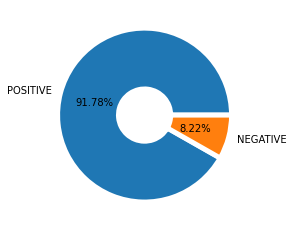

In [ ]:
plt.pie(ratio, labels= labels, autopct = '%.2f%%', wedgeprops=wedgeprops)
plt.show

##### Buliding Word_Cloud for dataset exploration

In [ ]:
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet 
from wordcloud import WordCloud
from collections import Counter

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Make a tag with those POS signs.
def tagging(tags):

  if tags.startswith('J'):
    return wordnet.ADJ 

  elif tags.startswith('V'):
    return wordnet.VERB 

  elif tags.startswith('N'):
    return wordnet.NOUN

  elif tags.startswith('R'):
    return wordnet.ADV
    
  else:
    return wordnet.NOUN

In [ ]:
def lemmatizing(sentences):
  
  #Made all sentences in lower cases to make easier.
  sentences = sentences.lower() 

  #This be the point of shifts in each word to word
  #Our word standard is words with a to z, more than three letters
  distirbution = r'\b[a-z]{3,}\b'

  # Tokenize { Word }
  tokenized_words = nltk.regexp_tokenize(sentences, distirbution) 

  # List of tuple (Word, pos_tag)
  tagged_tokens = nltk.pos_tag(tokenized_words)  
  
  stopping_words = stopwords.words('english')

  #Customized extra stop_words : Which is the list of words we don't want to take weights on.
  #This is made because we want to specify which point customers felt good/bad with the provided service from hotel.
  #For example, in reviews of course we will get the word "hotel" the most frequently, so it has to be removed.
  adding_stopwords = ['hotel','everything','anything','nothing','thing', 'day', 'night', 'time'] 
  
  # ADD our custom words needs in stopword.                  
  stopping_words.extend(adding_stopwords)
  stopping_words = set(stopping_words)

  # Function from WordNet.
  WN_LEM = WordNetLemmatizer()                             

  lemmatized_words = []

  # Since we need the factor that affects in evaluation of hotel services, we only need NOUNs and VERBs.
  for word, tag in tagged_tokens:
    if word not in stopping_words and word not in string.punctuation:
      if tag.startswith('N'):
        lemmatized_words.append(WN_LEM.lemmatize(word, tagging(tag)))

  return lemmatized_words

In [ ]:
def Cloud_plot(review_data, color, title):

  #Pass our dataframe in list
  reviews = review_data['review'].tolist()

  #call function "lemmatized_tokens", it will combine all list of words with ' ' : additional space } for distinguisher
  
  lemmatized_text = lemmatizing(' '.join(reviews))
  stringof_word = ' '.join(lemmatized_text)


  wordcloud = WordCloud(collocations = False, background_color = color, 
                        width=1600, height=800, margin=2, 
                        min_font_size=20, relative_scaling = 0.75).generate(stringof_word)

  plt.figure(figsize = (10, 7.5))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.figtext(.5,.8,title,fontsize = 20, ha= 'center')
  plt.show()

  return stringof_word, lemmatized_text

##### WordCloud Result

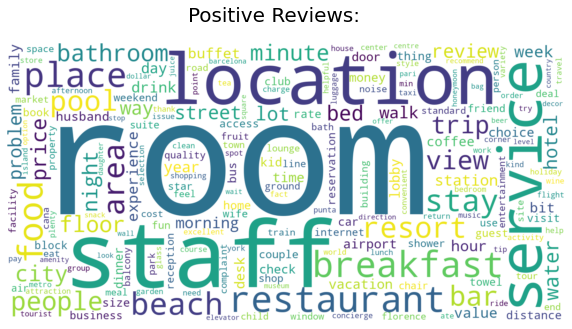

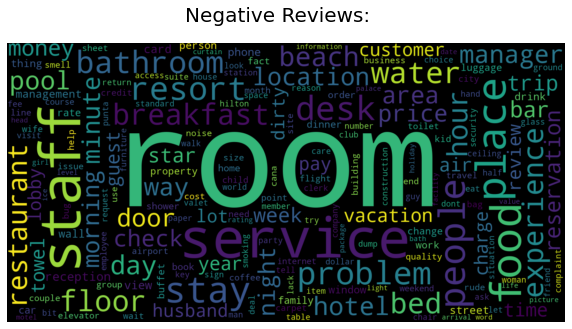

In [ ]:
# Wordcoulds for Positive Reviews
pos_words, pos_lem = Cloud_plot(pos_reviews, 'white','Positive Reviews: ')

# WordCoulds for Negative Reviews
neg_words, neg_lem = Cloud_plot(neg_reviews, 'black', 'Negative Reviews:')

### Simple Tendancy research

In [ ]:
# These tags are gained from the worldcloud above. 
# Some of them are in common between positive and negative, which will be gained same as from LDA model.
# I will randomly type what I can see from the word cloud for the tags.
# It will return the most frequent seven words in the strings.

keyword_tags = ['room', 'location', 'service', 'restaurant', 'staff', 'people', 'place', 'breakfast', 'food', 'bathroom', 'resort']

def tendancy_searching(list_of_tags, target_string):
  temp_dict = {}
  for tags in list_of_tags:
    temp_dict[tags] = target_string.count(tags)

# Sorting our dict type result for easier research
  result = sorted(temp_dict.items(), key=lambda x: x[1], reverse=True)
  
  return result[:7]

##### Tendancy Result

In [ ]:
print("POSTIVIE : ", tendancy_searching(keyword_tags, pos_words))
print("NEGATIVE : ", tendancy_searching(keyword_tags, neg_words))

POSTIVIE :  [('room', 33303), ('staff', 12048), ('location', 8317), ('service', 6753), ('restaurant', 6430), ('breakfast', 6246), ('food', 6162)]
NEGATIVE :  [('room', 3848), ('staff', 763), ('service', 736), ('food', 516), ('place', 502), ('people', 413), ('resort', 358)]


# LDA Modeling Step

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
def LDA_model(lemmatized_words):
  
  text2vec = CountVectorizer(strip_accents = 'unicode',
                             lowercase = True,
                             max_df = 0.8,
                             min_df = 10)
  
  text_vectorizer = TfidfVectorizer(**text2vec.get_params())
  text_in_matrix = text_vectorizer.fit_transform(lemmatized_words)

  LDA = LatentDirichletAllocation()
  param_grid = {'n_components' : [1],
                'learning_decay' : [0.5, 0.7, 0.9],
                'learning_method' : ['online'],
                }
  
  model = GridSearchCV(LDA, param_grid = param_grid)

  model.fit(text_in_matrix)
  best_model = model.best_estimator_

  print("Best Parameter : ", model.best_params_, "\n Best Score", model.best_score_)

  return best_model, text_vectorizer

In [ ]:
#LDA_pos = LDA_model(pos_rev, 'review')
LDA_neg, neg_vectorizer = LDA_model(neg_lem)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning,


Best Parameter :  {'learning_decay': 0.7, 'learning_method': 'online', 'n_components': 1} 
 Best Score -46051.146298867316


In [ ]:
def display_topics(LDA, feature_names, n_top_words):
  
  topic_dict = {}
  for topic_idx, topic in enumerate(LDA.components_):
    topic_dict["Topic %d words" % (topic_idx+1)]= ['{}'.format(feature_names[i])
    for i in topic.argsort()[:-n_top_words - 1:-1]]

    topic_dict["Topic %d weights" % (topic_idx+1)]= ['{:.1f}'.format(topic[i])
    for i in topic.argsort()[:-n_top_words - 1:-1]]
  
  return pd.DataFrame(topic_dict)


display_topics(LDA_neg, neg_vectorizer.get_feature_names(), n_top_words = 20) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic 1 words,Topic 1 weights
0,room,3410.7
1,staff,762.8
2,service,724.5
3,food,516.8
4,place,474.2
5,people,416.5
6,stay,399.5
7,resort,378.4
8,problem,362.1
9,desk,342.5


In [ ]:
# Savings for further use.
pos_reviews.to_csv('/content/drive/MyDrive/Team2_LDA/POS_reviews.csv', index = False)
neg_reviews.to_csv('/content/drive/MyDrive/Team2_LDA/NEG_reviews.csv', index = False)